<a href="https://colab.research.google.com/github/jpzorrilla/IBM-Masterclass/blob/master/IBM_Masterclass_Explainability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [2]:
!pip install lale aix360 pandas numpy scikit-learn

     |████████████████████████████████| 532kB 3.4MB/s 
     |████████████████████████████████| 10.7MB 18.2MB/s 
     |████████████████████████████████| 1.9MB 39.2MB/s 
     |████████████████████████████████| 276kB 50.1MB/s 
     |████████████████████████████████| 276kB 48.6MB/s 
     |████████████████████████████████| 109.2MB 39kB/s 
     |████████████████████████████████| 1.7MB 29.3MB/s 
     |████████████████████████████████| 40kB 5.6MB/s 
     |████████████████████████████████| 491kB 45.9MB/s 
     |████████████████████████████████| 3.2MB 37.7MB/s 
  Created wheel for lime: filename=lime-0.2.0.0-cp36-none-any.whl size=284181 sha256=3265a09fbab6aef6ab5d1b9c45530b41206b7a4b4ea56da6a43ad39fdd0c847c
  Stored in directory: /root/.cache/pip/wheels/22/f2/ec/e5ebd07348b2b1ac722e91c2f549fcc220f7d5f25497a61232
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394111 sha256=916d612f6f70c98e5646bb7339efb809ca4bf63af5b4489b4698748fbd27432b
  Stored in directory: /ro

In [0]:
#import data from GitHub view raw
#sep = ; because the data is seperated by 
url = 'https://raw.githubusercontent.com/jpzorrilla/IBM-Masterclass/master/bank-additional-full.csv'
bank_data = pd.read_csv(url, sep=';')

In [8]:
bank_data2 = bank_data.copy()
bank_data2.info() # we have no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
#create a new dependent variable that is a integer
bank_data2['y new'] = bank_data2.y.map(dict(yes=1, no=0)); #map yes and no to booleans

#lets inspect the data to make sure our transform worked
bank_data2.head()

age        job  marital    education  ... euribor3m nr.employed   y y new
0   56  housemaid  married     basic.4y  ...     4.857      5191.0  no     0
1   57   services  married  high.school  ...     4.857      5191.0  no     0
2   37   services  married  high.school  ...     4.857      5191.0  no     0
3   40     admin.  married     basic.6y  ...     4.857      5191.0  no     0
4   56   services  married  high.school  ...     4.857      5191.0  no     0

[5 rows x 22 columns]

In [10]:
bank_data2.describe()

age      duration  ...   nr.employed         y new
count  41188.00000  41188.000000  ...  41188.000000  41188.000000
mean      40.02406    258.285010  ...   5167.035911      0.112654
std       10.42125    259.279249  ...     72.251528      0.316173
min       17.00000      0.000000  ...   4963.600000      0.000000
25%       32.00000    102.000000  ...   5099.100000      0.000000
50%       38.00000    180.000000  ...   5191.000000      0.000000
75%       47.00000    319.000000  ...   5228.100000      0.000000
max       98.00000   4918.000000  ...   5228.100000      1.000000

[8 rows x 11 columns]

In [11]:
#lets look at the median age, since this information is not realyed to us with the .describe function
bank_data2.age.median()

38.0

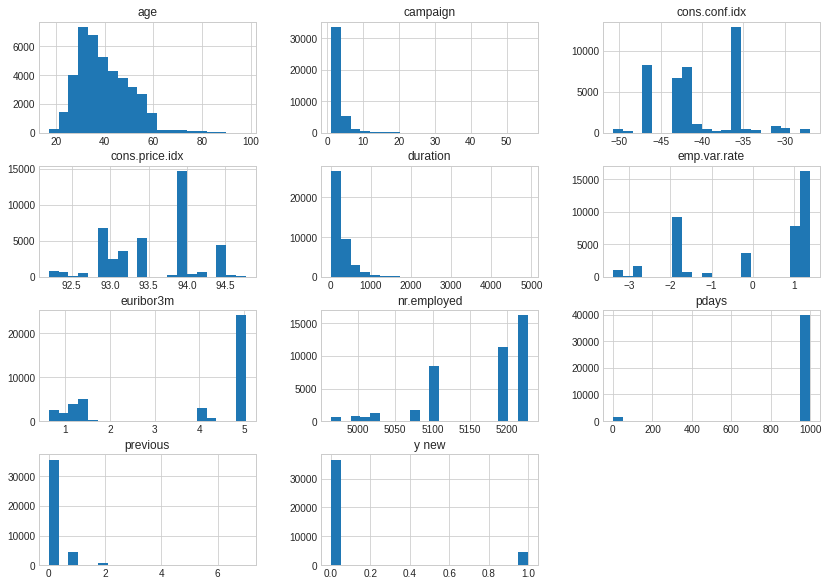

In [12]:
#lets make graphs for our numerical features
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

bank_data2.hist(bins=20, figsize=(14,10)) #show distributions of numeric data
plt.show()

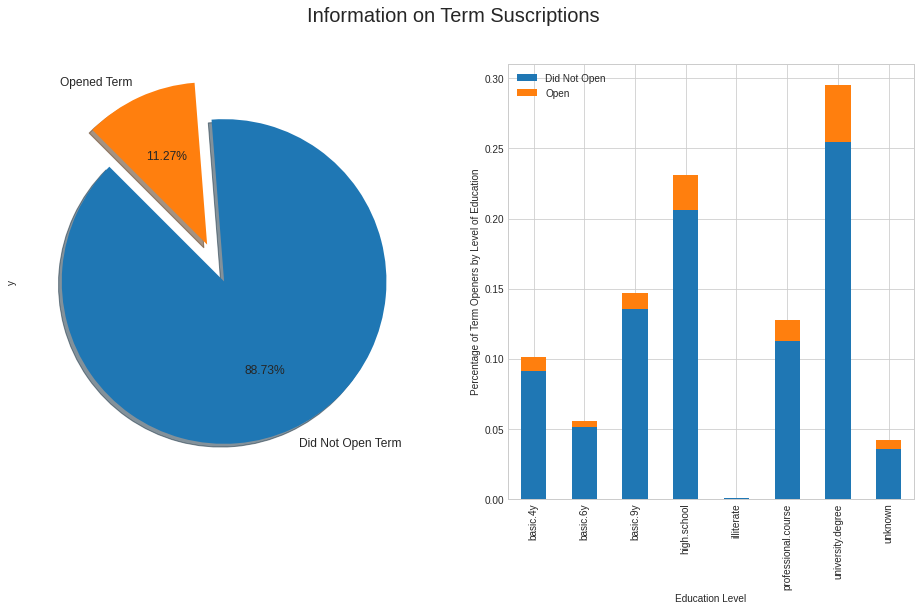

In [13]:
#preliminary analysis, exploring the data
#this code can be reformatted to display other information by changing the information in the .groupby function

labels = 'Did Not Open Term', 'Opened Term' 
fig, ax = plt.subplots(1,2,  figsize=(16,8))

#generate the pie chart
bank_data2["y"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True,
                                             labels=labels, fontsize=12, startangle=135)

plt.suptitle('Information on Term Suscriptions', fontsize=20)

df = bank_data2.groupby(['education', 'y']).size().groupby(level=0).apply(  #on this line, bank_data2.groupby(['FEATURE1, FEATURE 2']) can be changed, and the code will still run
    lambda x: x / bank_data2.shape[0]
).unstack().plot(kind='bar', ax = ax[1], stacked=True) #generates the bar chart on the left

#if you are using this code to graph different features, make sure to change axis labels and title
ax[1].set(ylabel="Percentage of Term Openers by Level of Education")
ax[1].set(xlabel="Education Level")
ax[1].legend(['Did Not Open', 'Open'])

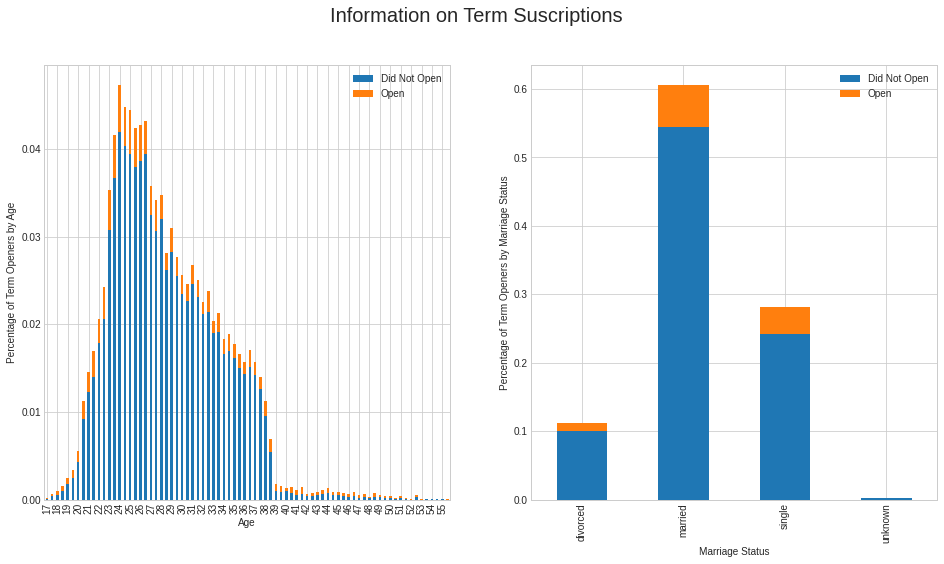

In [14]:
fig, ax = plt.subplots(1,2,  figsize=(16,8))

plt.suptitle('Information on Term Suscriptions', fontsize=20)

df = bank_data2.groupby(['age', 'y']).size().groupby(level=0, squeeze = True).apply( #on this line, bank_data2.groupby(['FEATURE1, FEATURE 2']) can be changed, and the code will still run
    lambda x: x / bank_data2.shape[0]
).unstack().plot(kind='bar', ax = ax[0], stacked=True)

ax[0].set(ylabel="Percentage of Term Openers by Age")
ax[0].set(xlabel="Age")
ax[0].locator_params(axis='x', nbins=60)
ax[0].legend(['Did Not Open', 'Open'])


df1 = bank_data2.groupby(['marital', 'y']).size().groupby(level=0).apply( 
    lambda x: x / bank_data2.shape[0]
).unstack().plot(kind='bar', ax = ax[1], stacked=True)

ax[1].set(ylabel="Percentage of Term Openers by Marriage Status")
ax[1].set(xlabel="Marriage Status")
ax[1].legend(['Did Not Open', 'Open'])

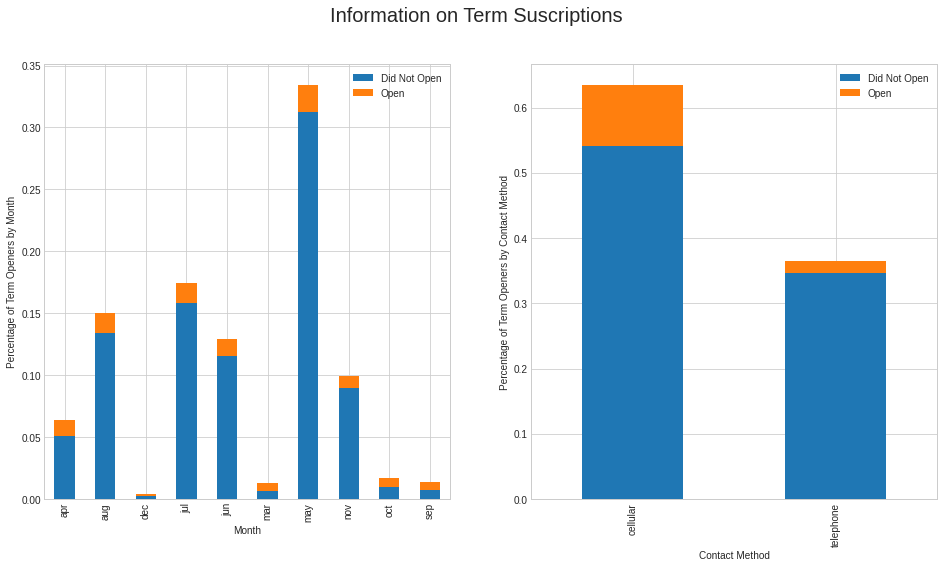

In [15]:
fig, ax = plt.subplots(1,2,  figsize=(16,8))

plt.suptitle('Information on Term Suscriptions', fontsize=20)

df = bank_data2.groupby(['month', 'y']).size().groupby(level=0, squeeze = True).apply( #on this line, bank_data2.groupby(['FEATURE1, FEATURE 2']) can be changed, and the code will still run
    lambda x: x / bank_data2.shape[0]
).unstack().plot(kind='bar', ax = ax[0], stacked=True)

ax[0].set(ylabel="Percentage of Term Openers by Month")
ax[0].set(xlabel="Month")
ax[0].locator_params(axis='x', nbins=60)
ax[0].legend(['Did Not Open', 'Open'])

df1 = bank_data2.groupby(['contact', 'y']).size().groupby(level=0).apply(
    lambda x: x / bank_data2.shape[0]
).unstack().plot(kind='bar', ax = ax[1], stacked=True)
# df = df.unstack()
# df.plot(kind = 'bar', ax = ax[1])#, lambda x: len(x) / len(df) * 100)

ax[1].set(ylabel="Percentage of Term Openers by Contact Method")
ax[1].set(xlabel="Contact Method")
ax[1].legend(['Did Not Open', 'Open'])

In [0]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

dependent_var = bank_data2['y new']                                                                                         
encoded_df = bank_data2.copy() #make a copy of the data so we do not permute the original data

encoded_df = encoded_df.drop(['y', 'y new'], axis=1) #drop the dependent variable

encoded_df = encoded_df.apply(encoder.fit_transform) #apply the transform with pandas apply function

In [17]:
#lets check to see if we encoded our data
encoded_df.head()

age  job  marital  ...  cons.conf.idx  euribor3m  nr.employed
0   39    3        1  ...             16        287            8
1   40    7        1  ...             16        287            8
2   20    7        1  ...             16        287            8
3   23    0        1  ...             16        287            8
4   39    7        1  ...             16        287            8

[5 rows x 20 columns]

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


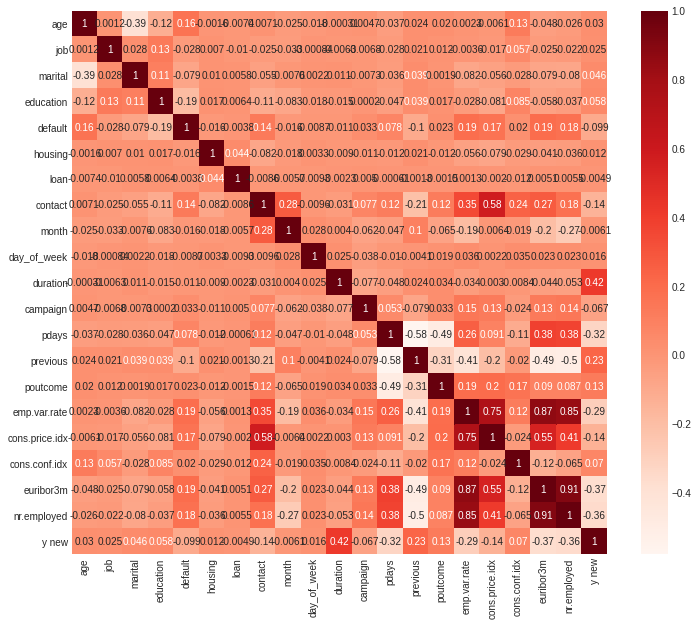

In [18]:
#lets create a correlation matrix now that we have our data encoded as a part of our EDA
import seaborn as sns

encoded_df2 = pd.concat([encoded_df, dependent_var], axis = 1)

plt.figure(figsize=(12,10))
cor = encoded_df2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [19]:
#lets parse the graphic above and find the most correlated features with our depenedent variable
cor_target = abs(cor["y new"])

#Selecting highly correlated features
relevant_features_pos = cor_target[cor_target>0.2]

print(relevant_features_pos, '\n')

duration        0.419889
pdays           0.320945
previous        0.230181
emp.var.rate    0.286833
euribor3m       0.368168
nr.employed     0.355135
y new           1.000000
Name: y new, dtype: float64 



In [20]:
#check for multicollinearity
feature_cors = encoded_df[['duration', 'pdays']].corr()
feature_cors1 = encoded_df[['euribor3m', 'nr.employed']].corr()
feature_cors2 = encoded_df[['job', 'marital']].corr()
feature_cors3 = encoded_df[['marital', 'age']].corr()
print(feature_cors,'\n \n', feature_cors1, '\n \n', feature_cors2, '\n \n', feature_cors3)

          duration    pdays
duration   1.00000 -0.04782
pdays     -0.04782  1.00000 
 
              euribor3m  nr.employed
euribor3m     1.000000     0.912401
nr.employed   0.912401     1.000000 
 
               job   marital
job      1.000000  0.027897
marital  0.027897  1.000000 
 
           marital       age
marital  1.000000 -0.389814
age     -0.389814  1.000000


In [21]:
encoded_df = encoded_df.drop(['age', 'housing', 'loan', 'default',  'day_of_week'], axis = 1)

encoded_df.describe();
encoded_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   job             41188 non-null  int64
 1   marital         41188 non-null  int64
 2   education       41188 non-null  int64
 3   contact         41188 non-null  int64
 4   month           41188 non-null  int64
 5   duration        41188 non-null  int64
 6   campaign        41188 non-null  int64
 7   pdays           41188 non-null  int64
 8   previous        41188 non-null  int64
 9   poutcome        41188 non-null  int64
 10  emp.var.rate    41188 non-null  int64
 11  cons.price.idx  41188 non-null  int64
 12  cons.conf.idx   41188 non-null  int64
 13  euribor3m       41188 non-null  int64
 14  nr.employed     41188 non-null  int64
dtypes: int64(15)
memory usage: 4.7 MB


In [22]:
#check that we dropped our columns
encoded_df.head()

job  marital  education  ...  cons.conf.idx  euribor3m  nr.employed
0    3        1          0  ...             16        287            8
1    7        1          3  ...             16        287            8
2    7        1          3  ...             16        287            8
3    0        1          1  ...             16        287            8
4    7        1          3  ...             16        287            8

[5 rows x 15 columns]

In [23]:
import lale
import lale.helpers
from lale.lib.lale import NoOp, ConcatFeatures
import sklearn as sk

#directly interpretable algorithms
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#non-interpretable algorithms
from sklearn.decomposition import PCA
from sklearn.svm import SVC as svc1
from xgboost import XGBClassifier as xgc1
from sklearn.ensemble import RandomForestClassifier as rfc1

#autowraps the previously imported stuff
lale.wrap_imported_operators()

from lale.lib.lale import Hyperopt

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.svm.classes module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.svm. Anything that cannot be imported from sklearn.svm is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neural_network.multilayer_perceptron module is  deprecated in version 0.22 and will be removed in version

In [24]:
# Split the data into the train and test data
train_len = int(.8*(bank_data2.shape[0]))
print(train_len)

train_x, train_y = encoded_df[:train_len], dependent_var[:train_len]
test_x, test_y = encoded_df[train_len:], dependent_var[train_len:]

32950


In [0]:
#combinators [>>, |] serve as operators to make the pipeline, where >> denotes the progression of the pipeline and | denotes a choice.
explainable_pipeline = (NoOp) >> (Tree | KNeighborsClassifier | LogisticRegression)

In [0]:
import os

os.environ["PATH"] += os.pathsep + r"C:\Users\eovit\Miniconda3\envs\virt\Library\bin\graphviz"

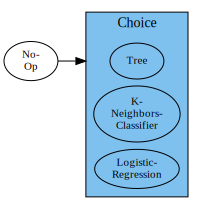

In [27]:
#if the code below does not work, you need to change the path for your graphviz module, which is located in the bin of your enviroment
    #see above code for the change on a Windows 10 system
explainable_pipeline.visualize()

In [28]:
trained_explainable = explainable_pipeline.auto_configure(train_x, train_y, \
                                                          optimizer = Hyperopt, cv = 3, max_evals = 3, scoring = "accuracy")

100%|██████████| 3/3 [00:11<00:00,  3.91s/trial, best loss: -0.8642470545918842]


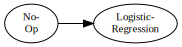

In [29]:
trained_explainable.visualize()

In [30]:
trained_explainable.pretty_print(show_imports= False, ipython_display= True)

```python
logistic_regression = LogisticRegression(C=2041.8997482991324, class_weight='balanced', fit_intercept=False, multi_class='auto', penalty='l1', solver='saga', tol=0.06377853181420248)
pipeline = NoOp() >> logistic_regression
```

In [31]:
#obtain the predictions on the test set
exp_predictions = trained_explainable.predict(test_x)

import sklearn.metrics

print(f'the accuracy of the explainable pipeline is {sklearn.metrics.accuracy_score(exp_predictions, test_y)}')

the accuracy of the explainable pipeline is 0.6950716193250789


In [0]:
#combinators [>>, |] serve as operators to make the pipeline, where >> denotes the progression of the pipeline and | denotes a choice.
unexplainable_pipeline = lale.operators.make_union(NoOp , PCA) >> ( svc1  | rfc1 | xgc1)

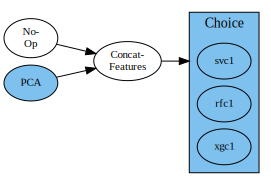

In [33]:
unexplainable_pipeline.visualize()

In [34]:
trained_unexplainable = unexplainable_pipeline.auto_configure(train_x, train_y, \
                                                              optimizer = Hyperopt, cv = 3, max_evals = 3, scoring = "accuracy")

100%|██████████| 3/3 [01:47<00:00, 35.86s/trial, best loss: -0.9394839349483964]


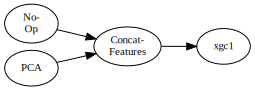

In [35]:
trained_unexplainable.visualize()

In [36]:
trained_unexplainable.pretty_print(show_imports= False, ipython_display= True)

```python
pca = PCA(svd_solver='full')
xgc1 = xgc1(booster='gblinear', colsample_bylevel=0.8800094729886384, colsample_bytree=0.24347633774591215, learning_rate=0.4596285154827624, max_depth=20, min_child_weight=2, n_estimators=1412, reg_alpha=0.3292628550216524, reg_lambda=0.8707348588077812, subsample=0.605086288753513)
pipeline = (NoOp() & pca) >> ConcatFeatures() >> xgc1
```

In [37]:
#obtain the predictions on the test set
unexp_predictions = trained_unexplainable.predict(test_x)

import sklearn.metrics

print(f'the accuracy of the explainable pipeline is {sklearn.metrics.accuracy_score(unexp_predictions, test_y)}')

the accuracy of the explainable pipeline is 0.7209274095654286


In [0]:
import aix360 
from aix360.algorithms.lime import LimeTabularExplainer

class_names = [0, 1]
#instantiate the explanations for the data set
limeexplainer = LimeTabularExplainer(test_x.values, class_names=class_names, feature_names = train_x.columns, discretize_continuous = True)

idx = 10
explainable_exp = limeexplainer.explain_instance(test_x.values[idx], trained_explainable.predict_proba, num_features=5, labels=class_names)

In [39]:
#explainable
explainable_exp.show_in_notebook(show_table=True, show_all=False)

In [0]:
#note that the difference is that the predictions come from <trained_unexplainable> now instead of <trained_explaianble>
unexplainable_exp = limeexplainer.explain_instance(test_x.values[idx], trained_unexplainable.predict_proba, num_features=5, labels=class_names)

In [42]:
#explainable
unexplainable_exp.show_in_notebook(show_table=True, show_all=False)

In [43]:
#lets see the actual class for observation 10 versus the classifications our models came up with
actual_val = test_y.iloc[10]
print(f'the actual value is for the class is: {actual_val}')

the actual value is for the class is: 0


In [44]:
#lets use these metrics on our two different algorithms!

#Interpretable pipeline metrics
from aix360.metrics import faithfulness_metric, monotonicity_metric

exp_predicted_class = trained_explainable.predict(test_x.values[0].reshape(1,-1))[0]
le = explainable_exp.local_exp[exp_predicted_class]

m = explainable_exp.as_map()

x = test_x.values[0]
coefs = np.zeros(x.shape[0])

for v in le:
    coefs[v[0]] = v[1]


base = np.zeros(x.shape[0])


print("Faithfulness: ", faithfulness_metric(trained_explainable, x, coefs, base))
print("Monotoncity: ", monotonicity_metric(trained_explainable, x, coefs, base))

Faithfulness:  0.24480517076962532
Monotoncity:  False


In [45]:
#Non-interpretable pipeline metrics

predicted_class = trained_unexplainable.predict(test_x.values[0].reshape(1,-1))[0]
le = unexplainable_exp.local_exp[predicted_class]

m = unexplainable_exp.as_map()

x = test_x.values[0]
coefs = np.zeros(x.shape[0])

for v in le:
    coefs[v[0]] = v[1]


base = np.zeros(x.shape[0])


print("Faithfulness: ", faithfulness_metric(trained_unexplainable, x, coefs, base))
print("Monotoncity: ", monotonicity_metric(trained_unexplainable, x, coefs, base))

Faithfulness:  0.6655704942937621
Monotoncity:  False
